# Exploração inicial dos dados de inscrições

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

data_path = "../data/processed/aprovacoes.csv"

In [30]:
aprovacoes = pd.read_csv(data_path)

---

In [31]:
aprovacoes.head()

,nome_aluno,codigo_curso,disciplinas_aprovadas,nome_curso,area_concentracao,creditos,nome_area_concentracao
0,ADIGINTON JACKSON KING FERREIRA,SIN5013,2,ANÁLISE DE ALGORITMOS E ESTRUTURAS DE DADOS,100131,8.0,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO
1,ALEX FREDERICO RAMOS BARBOZA,SIN5013,2,ANÁLISE DE ALGORITMOS E ESTRUTURAS DE DADOS,100131,8.0,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO
2,ALEXANDRE FARIAS SANTOS,SIN5013,3,ANÁLISE DE ALGORITMOS E ESTRUTURAS DE DADOS,100131,8.0,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO
3,ALEXIA CAROLINA SCHEFFER DA SILVA,SIN5013,2,ANÁLISE DE ALGORITMOS E ESTRUTURAS DE DADOS,100131,8.0,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO
4,ALINE CRISTINA MACHADO DE OLIVEIRA,SIN5013,2,ANÁLISE DE ALGORITMOS E ESTRUTURAS DE DADOS,100131,8.0,METODOLOGIA E TÉCNICAS DA COMPUTAÇÃO


## Qual o número de aprovações por disciplina?

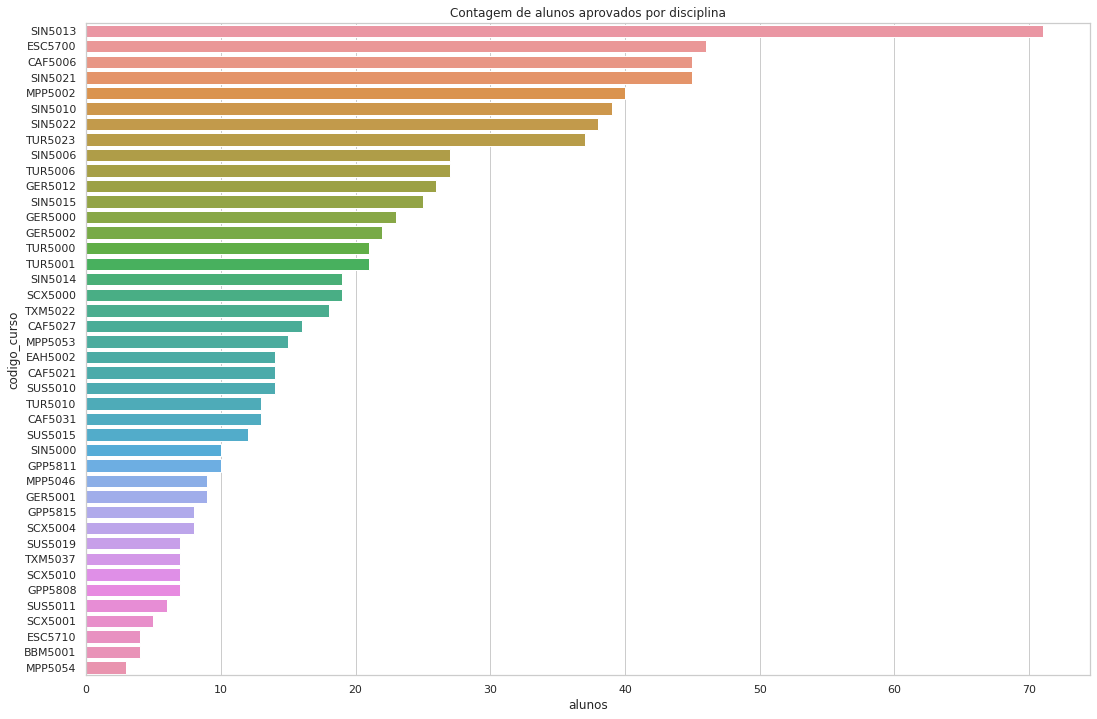

In [49]:
grouped = aprovacoes.groupby(["codigo_curso", "area_concentracao"]).agg({"nome_aluno": "count"}).reset_index().rename(columns={"nome_aluno": "alunos"}).sort_values(by=["alunos"], ascending=False)

fig, ax = plt.subplots(figsize=(18, 12))
sns.barplot(
    x="alunos",
    y="codigo_curso",
    data=grouped,
    orient="h",
    ax=ax
)

ax.set_title("Contagem de alunos aprovados por disciplina")
plt.show()

## Quais são as áreas de atuação com o maior número de alunos especiais aprovados?

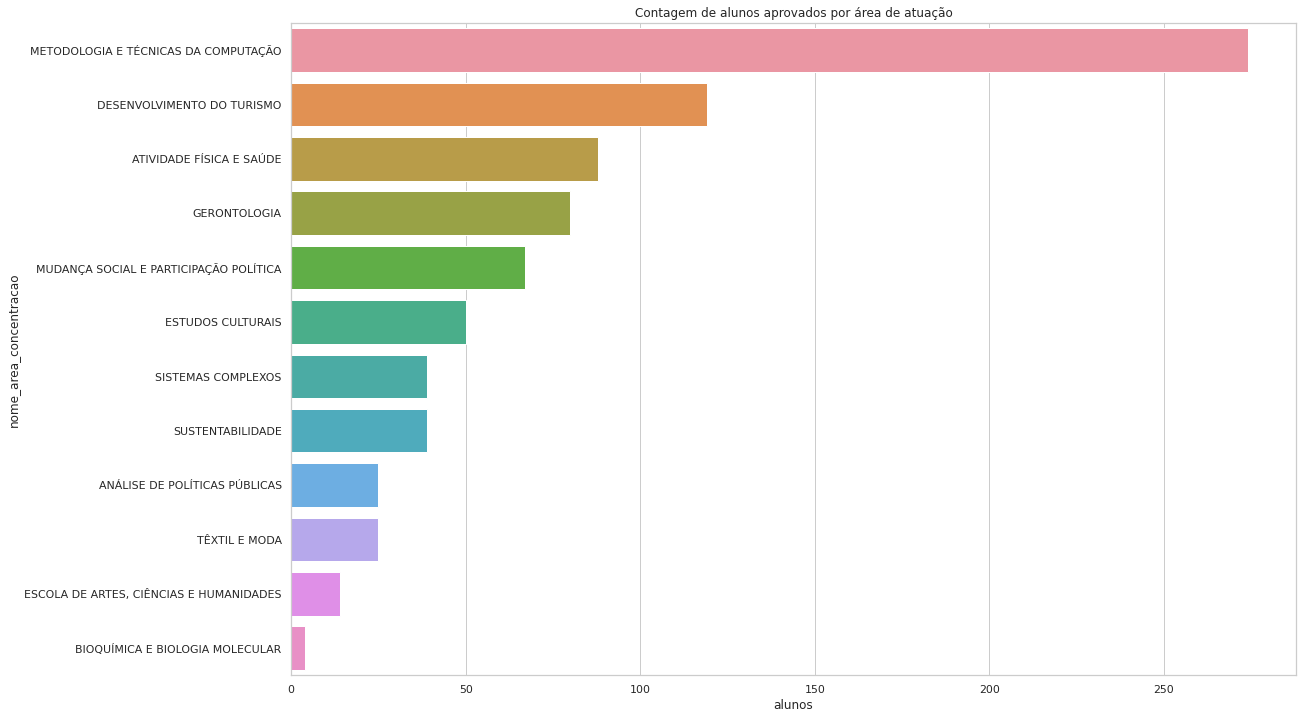

In [48]:
grouped = aprovacoes.groupby(["nome_area_concentracao"]).agg({"nome_aluno": "count"}).reset_index().rename(columns={"nome_aluno": "alunos"}).sort_values(by=["alunos"], ascending=False)

fig, ax = plt.subplots(figsize=(18, 12))
sns.barplot(
    x="alunos",
    y="nome_area_concentracao",
    data=grouped,
    orient="h",
    ax=ax,
)

ax.set_title("Contagem de alunos aprovados por área de atuação")
plt.show()

# Qual o número médio de aprovações dos candidatos?

In [57]:
area_concentracao_disciplinas_aprovadas = aprovacoes[["nome_aluno", "disciplinas_aprovadas", "nome_area_concentracao"]].drop_duplicates()

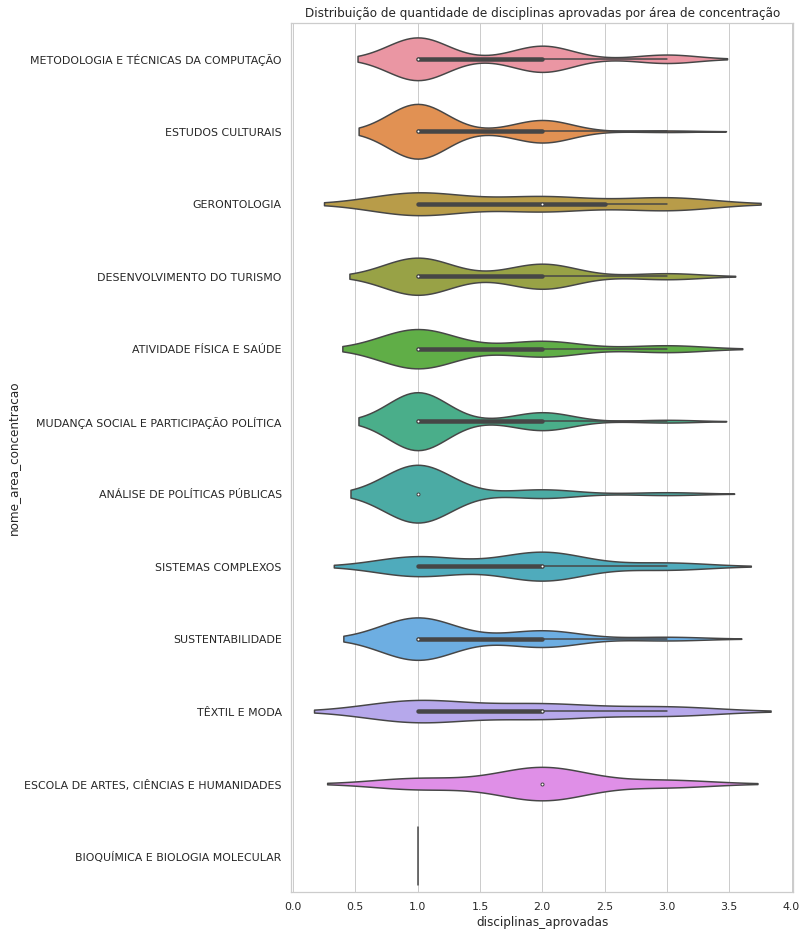

In [69]:
fig, ax = plt.subplots(figsize=(9, 16))

sns.violinplot(y="nome_area_concentracao", x="disciplinas_aprovadas", data=area_concentracao_disciplinas_aprovadas, orient="h", showfliers=False, ax=ax)

ax.set_title("Distribuição de quantidade de disciplinas aprovadas por área de concentração")
plt.show()

## Qual o número médio de disciplinas aprovadas por disciplina inscrita

In [70]:
curso_disciplinas_aprovadas = aprovacoes[["nome_aluno", "disciplinas_aprovadas", "codigo_curso"]].drop_duplicates()

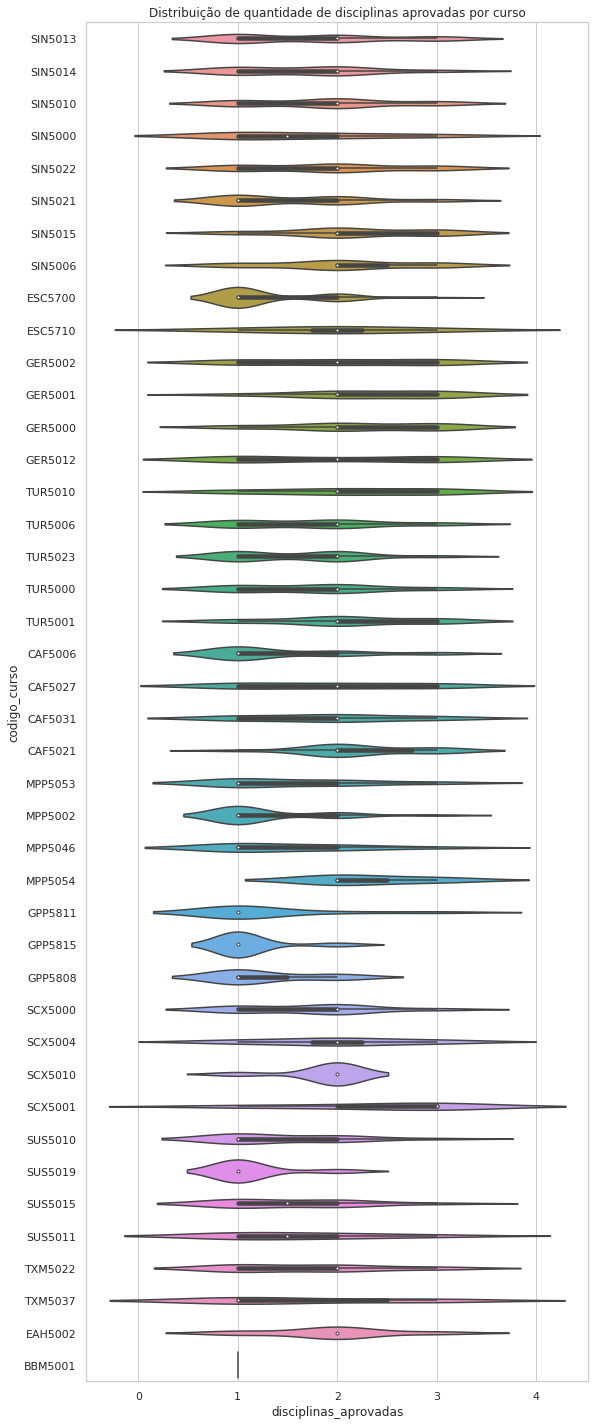

In [73]:
fig, ax = plt.subplots(figsize=(9, 25))

sns.violinplot(y="codigo_curso", x="disciplinas_aprovadas", data=curso_disciplinas_aprovadas, orient="h", showfliers=False, ax=ax)

ax.set_title("Distribuição de quantidade de disciplinas aprovadas por curso")
plt.show()